<a href="https://colab.research.google.com/github/haadirakhangi/Predict-Student-Performance-From-GamePlay/blob/main/predict_students_perf_haadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FEATURE ENGINEERING

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/drive/MyDrive/Datasets/predict-student-performance-from-game-play.zip     #comment this once you have unzipped

Archive:  /content/drive/MyDrive/Datasets/predict-student-performance-from-game-play.zip
  inflating: jo_wilder/__init__.py   
  inflating: jo_wilder/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: jo_wilder_310/__init__.py  
  inflating: jo_wilder_310/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: train_labels.csv        


In [ ]:
# !gdown --id "1y1ttzUlR6gPnLjDrdn8eoPanp14uT9Wc"     #only if you are doing in your own g account

In [ ]:
dtypes = {"session_id": 'int64',
          "index": np.int32,
          "elapsed_time": np.int32,
          "event_name": 'category',
          "name": 'category',
          "level": np.int8,
          "page": np.float32,
          "room_coor_x": np.float32,
          "room_coor_y": np.float32,
          "screen_coor_x": np.float32,
          "screen_coor_y": np.float32,
          "hover_duration": np.float32,
          "text": 'category',
          "fqid": 'category',
          "room_fqid": 'category',
          "text_fqid": 'category',
          "fullscreen": np.int8,
          "hq": np.int8,
          "music": np.int8,
          "level_group": 'category'
          }

df = pd.read_csv('/content/train.csv', dtype = dtypes)

In [ ]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [ ]:
df.shape

(26296946, 20)

In [ ]:
train_labels = pd.read_csv('/content/train_labels.csv')
train_labels.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [ ]:
train_labels.shape

(424116, 2)

In [ ]:
train_labels['session'] = train_labels['session_id'].apply(lambda x: int(x.split('_')[0]))
train_labels['n'] = train_labels['session_id'].apply(lambda x: int(x.split('_')[1][1:]))
train_labels.head()

,session_id,correct,session,n
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [ ]:
train_labels.drop('session_id', axis=1, inplace =True)
train_labels.head()

,correct,session,n
0,1,20090312431273200,1
1,0,20090312433251036,1
2,1,20090312455206810,1
3,0,20090313091715820,1
4,1,20090313571836404,1


In [ ]:
df.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int32   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           int8    
 6   page            float32 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      int8    
 17  hq              int8    
 18  music           int8    
 19  level_group     category
dtypes: category(7), float32(6), int32(2), int64(1), int8(4)
memory usage: 1.3 GB


In [ ]:
category = df.select_dtypes(include='category').columns.tolist()
numerical = df.select_dtypes(exclude='category').columns.tolist()

In [ ]:
category

['event_name', 'name', 'text', 'fqid', 'room_fqid', 'text_fqid', 'level_group']

In [ ]:
numerical

['session_id',
 'index',
 'elapsed_time',
 'level',
 'page',
 'room_coor_x',
 'room_coor_y',
 'screen_coor_x',
 'screen_coor_y',
 'hover_duration',
 'fullscreen',
 'hq',
 'music']

In [ ]:
del numerical[0:2]
numerical

['elapsed_time',
 'level',
 'page',
 'room_coor_x',
 'room_coor_y',
 'screen_coor_x',
 'screen_coor_y',
 'hover_duration',
 'fullscreen',
 'hq',
 'music']

In [ ]:
def feature_engineering(df):
  dfs =[]
  for c in category:
    temp = df.groupby(['session_id','level_group'])[c].agg('nunique')
    temp.name = temp.name + '_nunique'
    dfs.append(temp)
  for c in numerical:
    temp = df.groupby(['session_id','level_group'])[c].agg('mean')
    dfs.append(temp)
  for c in numerical:
    temp = df.groupby(['session_id','level_group'])[c].agg('std')
    temp.name = temp.name + '_std'
    dfs.append(temp)

    dataset_df = pd.concat(dfs,axis=1)
    dataset_df = dataset_df.fillna(-1)
    dataset_df = dataset_df.reset_index()
    dataset_df = dataset_df.set_index('session_id')

  return dataset_df

In [ ]:
new_df = feature_engineering(df)
new_df

,level_group,event_name_nunique,name_nunique,text_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,level_group_nunique,elapsed_time,level,...,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std,fullscreen_std,hq_std,music_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,56,30,7,17,1,8.579356e+04,1.945455,...,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757,0.0,0.0,0.0
20090312431273200,13-22,10,3,168,49,12,35,1,1.040601e+06,17.402381,...,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265,0.0,0.0,0.0
20090312431273200,5-12,10,3,124,39,11,24,1,3.572052e+05,8.054054,...,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315,0.0,0.0,0.0
20090312433251036,0-4,11,4,49,22,6,11,1,9.763342e+04,1.870504,...,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406,0.0,0.0,0.0
20090312433251036,13-22,11,6,183,73,16,43,1,2.498852e+06,17.762529,...,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,13-22,11,4,166,49,12,33,1,9.619192e+05,17.671395,...,2.359474,0.908083,589.562720,273.090325,248.584999,134.772721,1675.299532,0.0,0.0,0.0
22100219442786200,5-12,11,6,116,41,11,20,1,3.866058e+05,8.111511,...,2.180934,0.923548,390.345335,147.579436,250.827193,135.693654,1910.823123,0.0,0.0,0.0
22100221145014656,0-4,11,4,64,27,7,17,1,2.036104e+05,2.061611,...,1.276526,0.516398,392.539487,159.619091,213.638122,128.499750,6725.520698,0.0,0.0,0.0


# EDA

<Axes: ylabel='Proportion of correct and incorrect answers'>

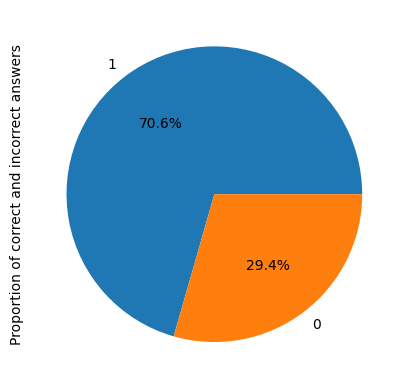

In [ ]:
train_labels['correct'].value_counts().plot(kind='pie', autopct='%0.1f%%', label= 'Proportion of correct and incorrect answers')

<Axes: xlabel='n', ylabel='count'>

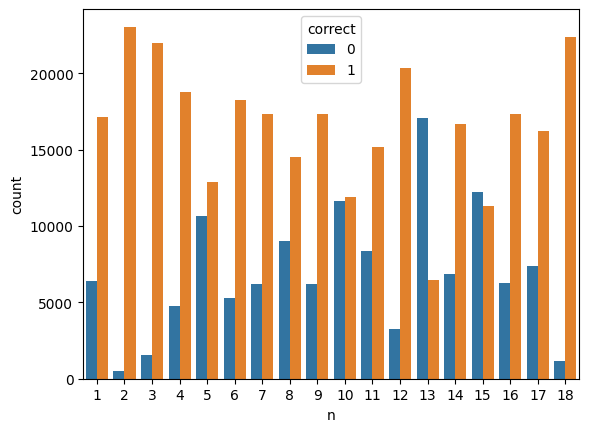

In [ ]:
sns.countplot(train_labels, x = train_labels.n, hue= train_labels.correct)

In [ ]:
train_labels[train_labels.n == 1]

,correct,session,n
0,1,20090312431273200,1
1,0,20090312433251036,1
2,1,20090312455206810,1
3,0,20090313091715820,1
4,1,20090313571836404,1
...,...,...,...
23557,1,22100215342220508,1
23558,0,22100215460321130,1
23559,1,22100217104993650,1
23560,0,22100219442786200,1


In [ ]:
len(train_labels.n.unique())

18

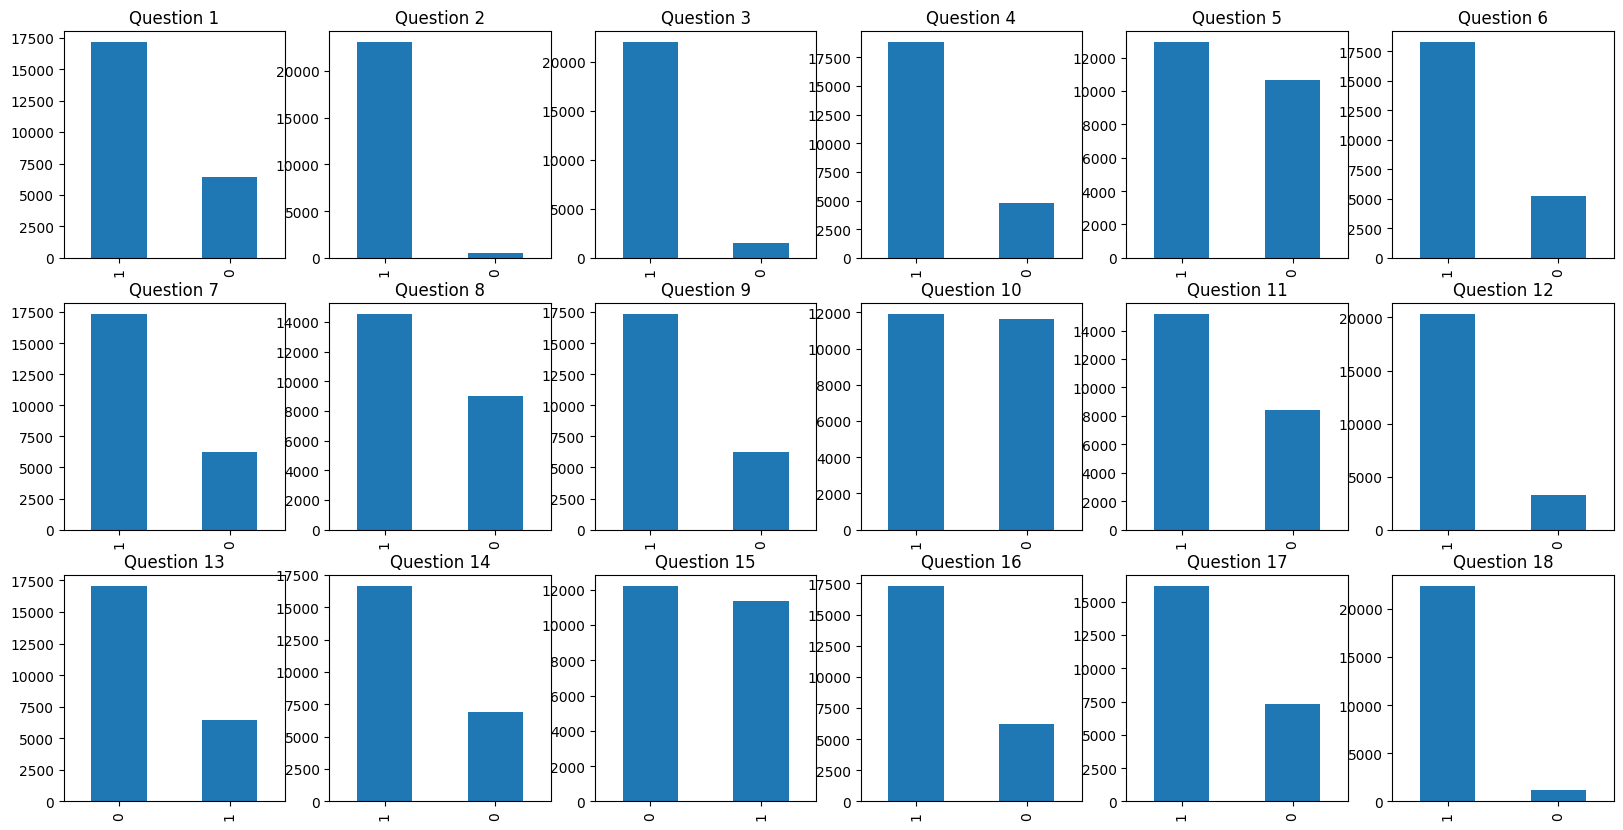

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(train_labels.n.unique())):
  ax = plt.subplot(3,6,i+1)
  df_plot = train_labels[train_labels.n == (i+1)]
  df_plot = df_plot.correct.value_counts()
  df_plot.plot(ax=ax, kind="bar")
  ax.set_title("Question "+str(i+1))

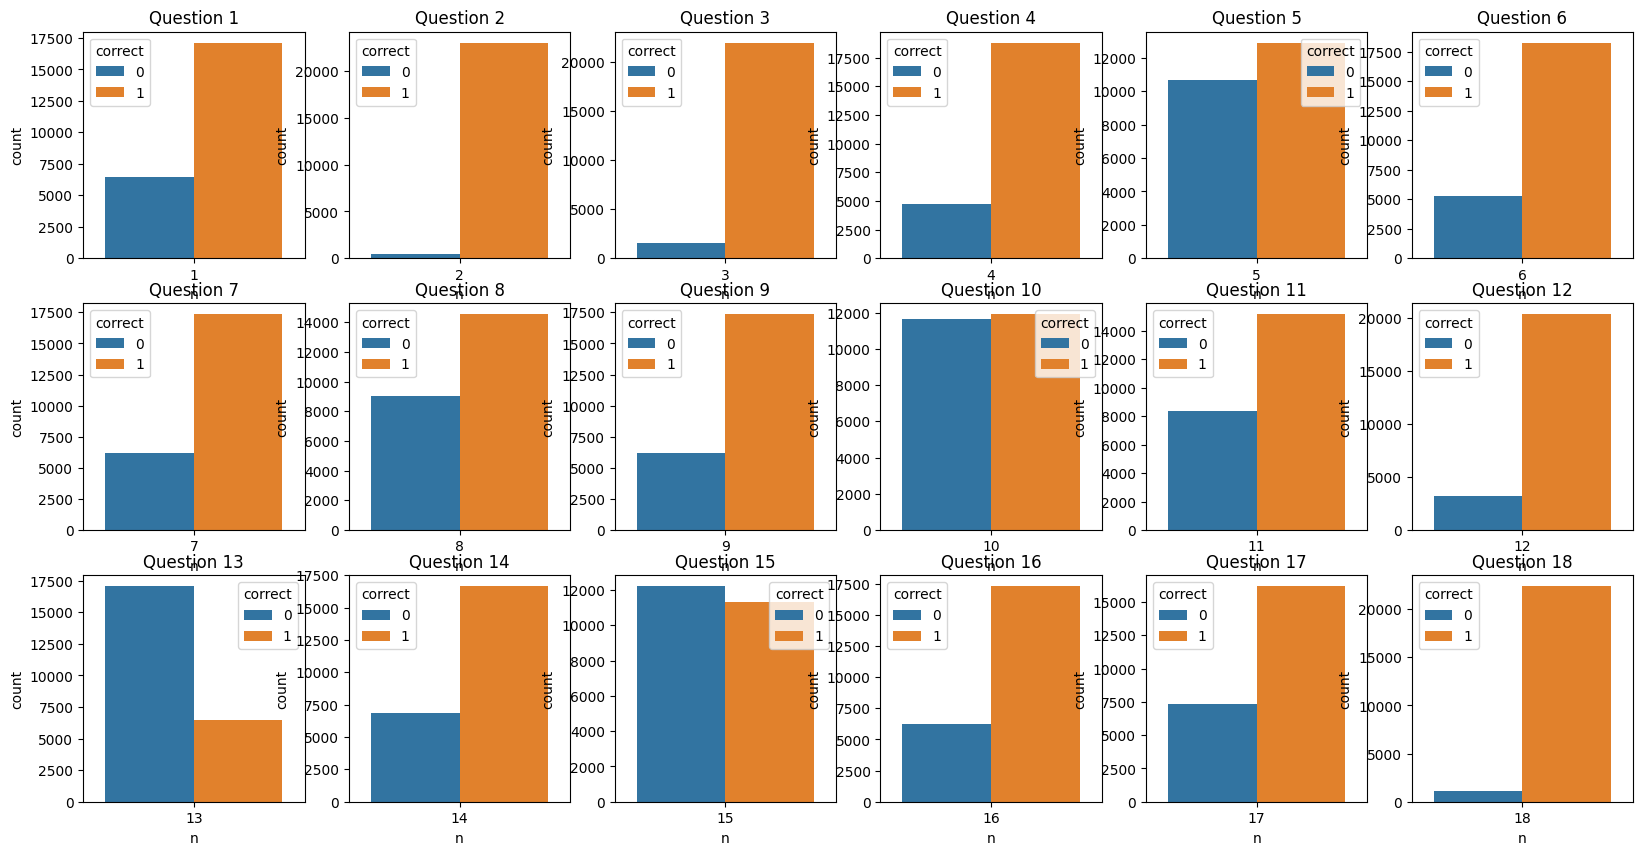

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(train_labels.n.unique())):
  ax = plt.subplot(3,6,i+1)
  df_plot = train_labels[train_labels.n == (i+1)]
  sns.countplot(df_plot, x = df_plot.n, hue= df_plot.correct)
  ax.set_title("Question "+str(i+1))

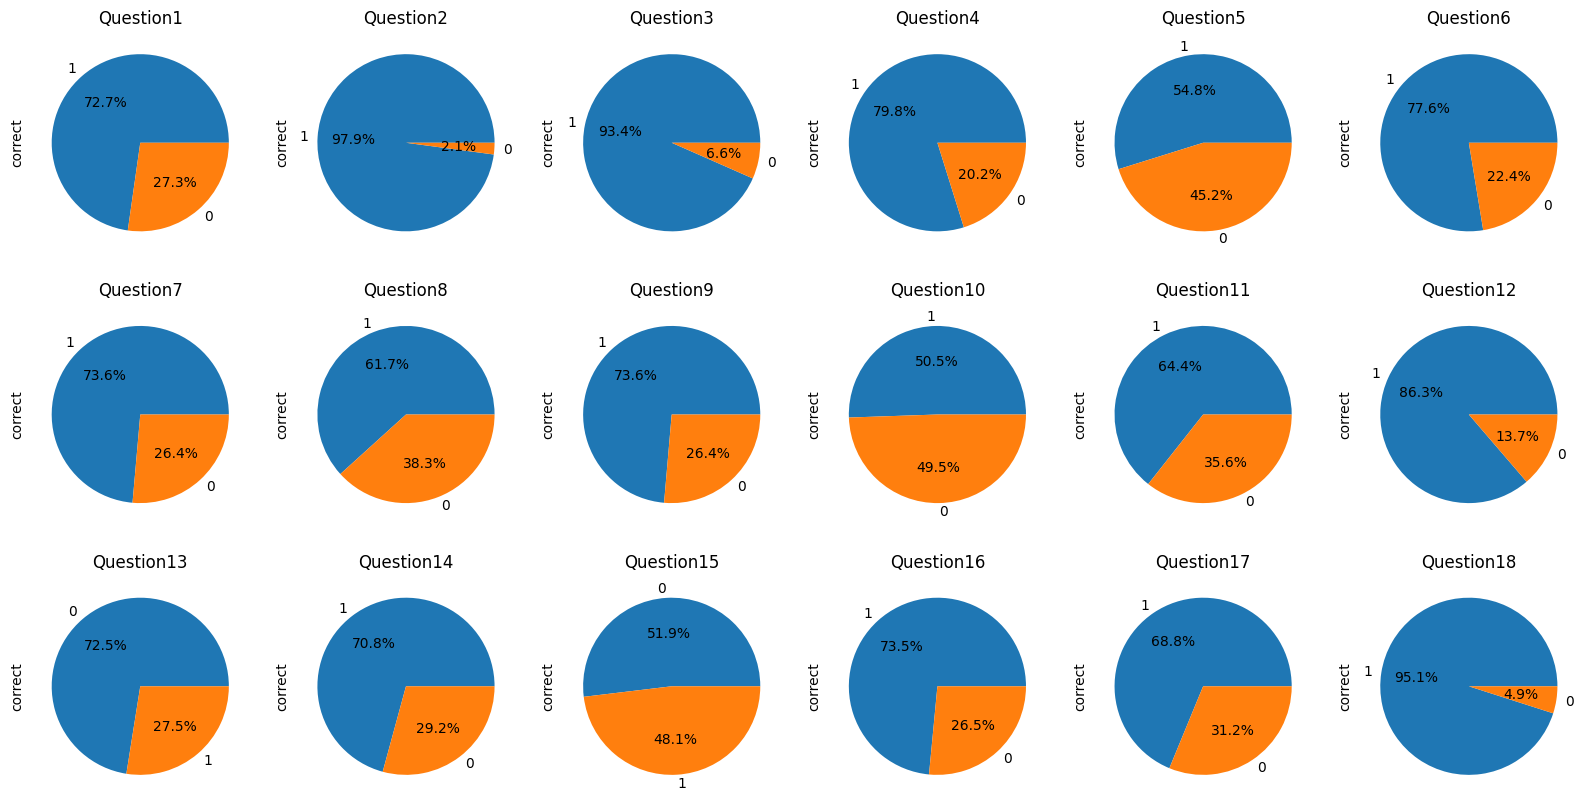

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(train_labels.n.unique())):
  ax = plt.subplot(3,6,i+1)
  df_plot = train_labels[train_labels.n == (i+1)]
  df_plot['correct'].value_counts().plot(kind='pie', autopct='%0.1f%%')
  ax.set_title('Question'+str(i+1))

<Axes: ylabel='session_id'>

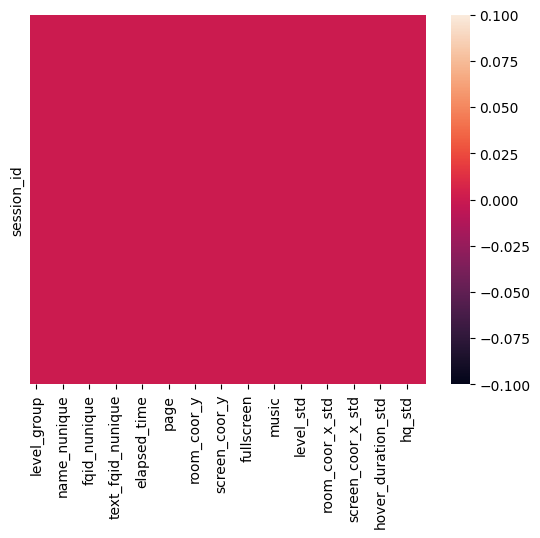

In [ ]:
sns.heatmap(new_df.isna(), yticklabels= False)

<Axes: ylabel='level'>

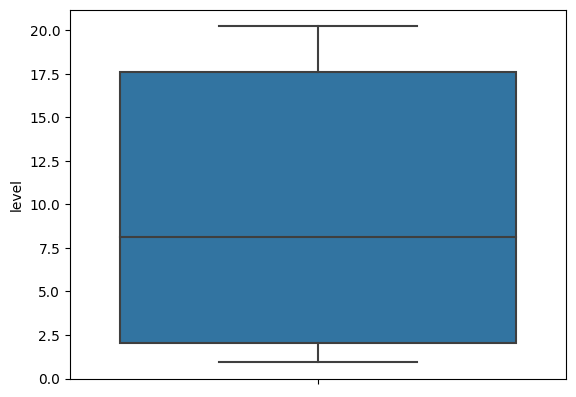

In [ ]:
sns.boxplot(new_df,y=new_df['level'])

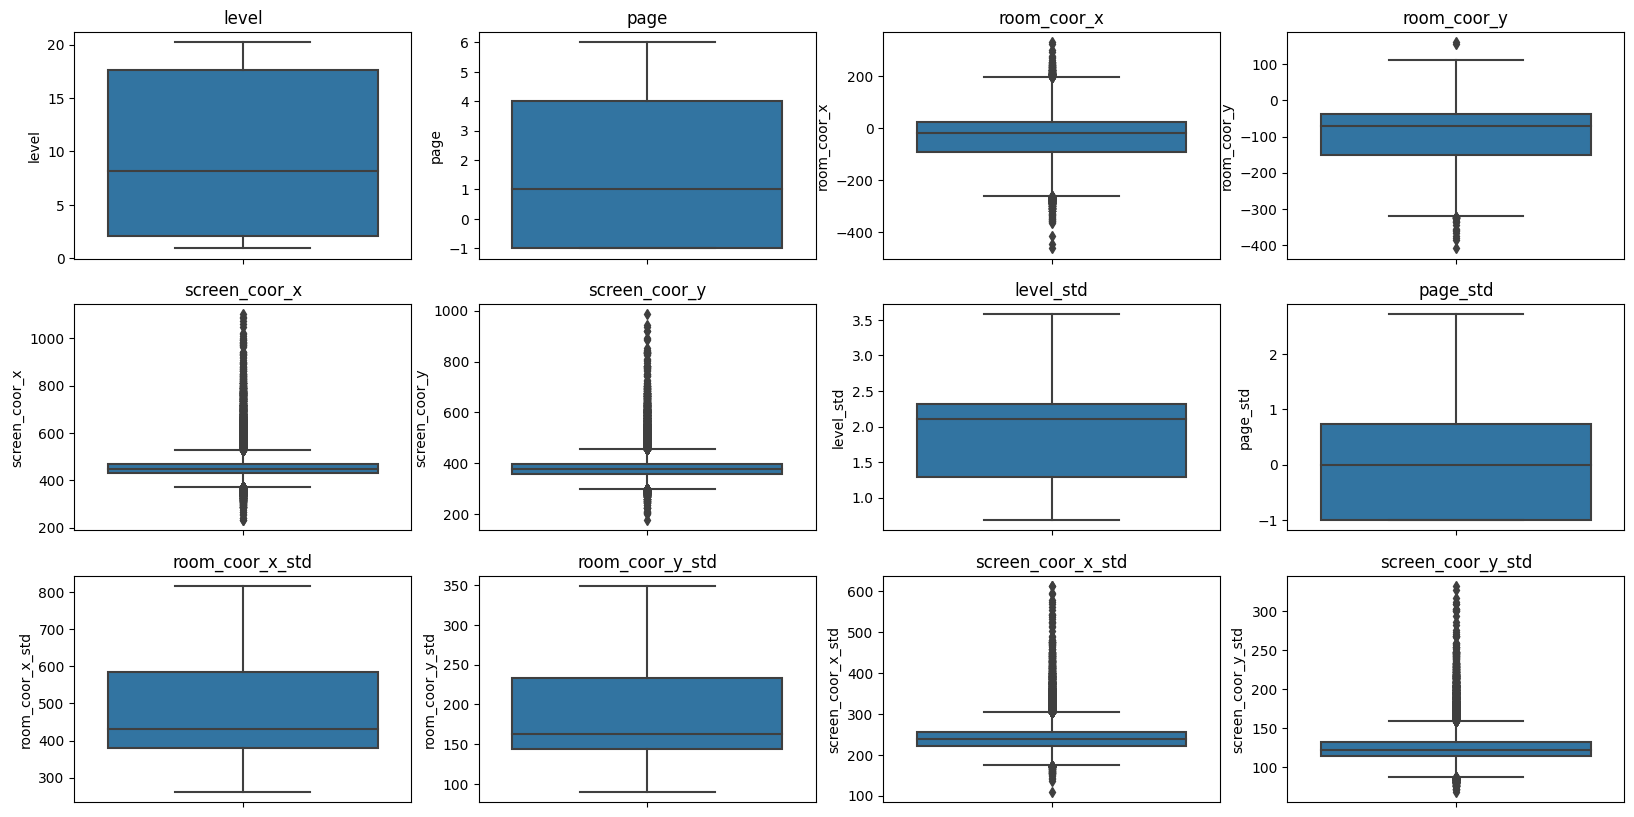

In [ ]:
df_numerical = ['level','page','room_coor_x','room_coor_y','screen_coor_x','screen_coor_y','level_std','page_std','room_coor_x_std','room_coor_y_std','screen_coor_x_std','screen_coor_y_std']
plt.figure(figsize=(20,10))
i=1
for col in df_numerical:
  ax = plt.subplot(3,4,i)
  sns.boxplot(new_df,y= new_df[col])
  ax.set_title(col)
  i+=1

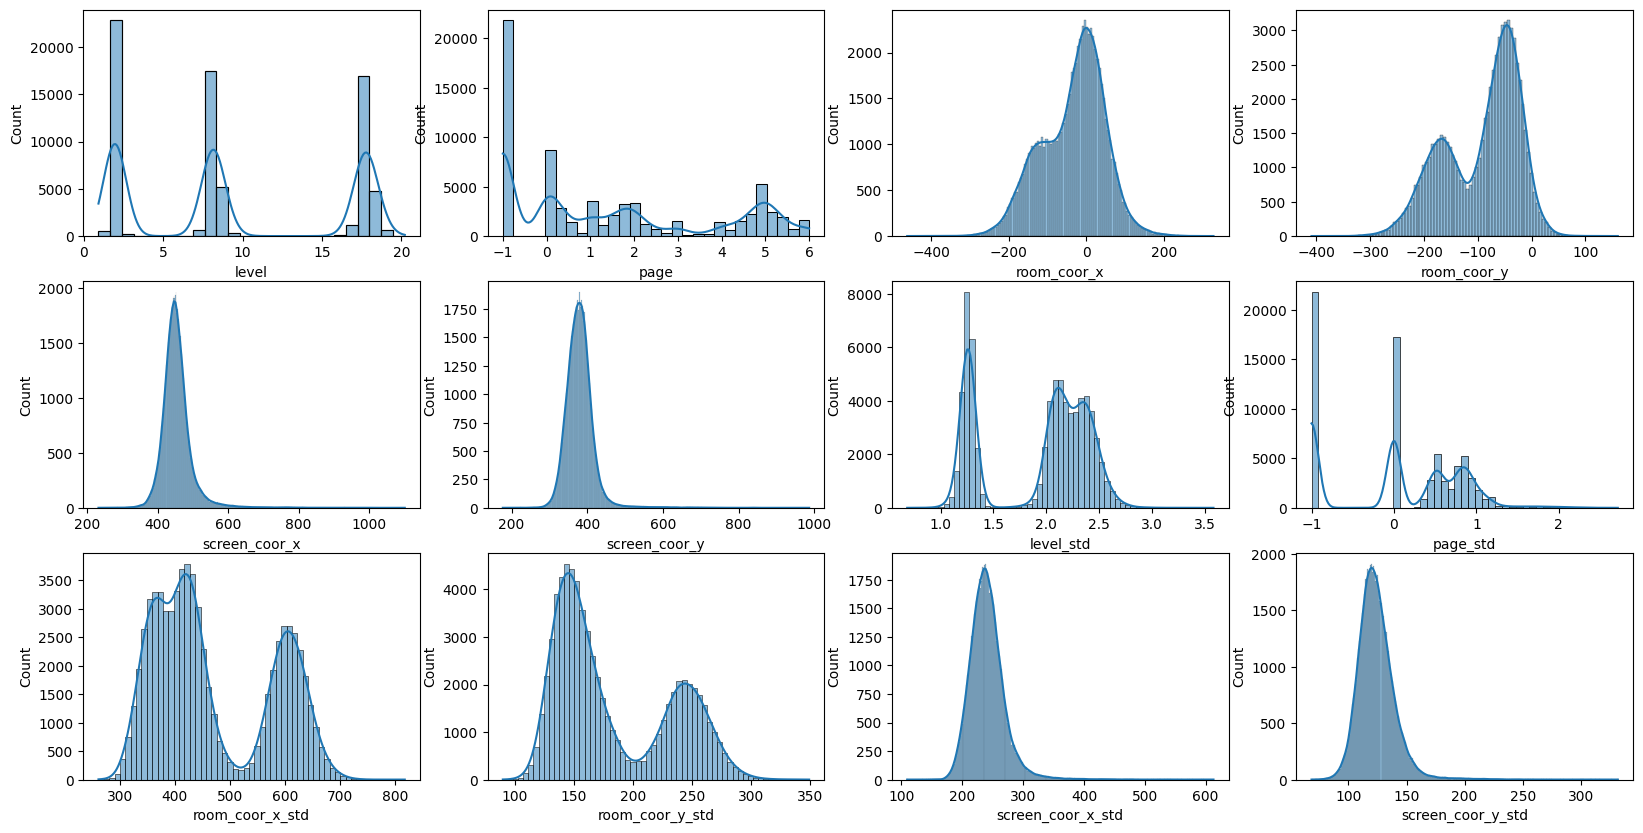

In [ ]:
df_numerical = ['level','page','room_coor_x','room_coor_y','screen_coor_x','screen_coor_y','level_std','page_std','room_coor_x_std','room_coor_y_std','screen_coor_x_std','screen_coor_y_std']
plt.figure(figsize=(20,10))
i=1
for col in df_numerical:
  ax = plt.subplot(3,4,i)
  sns.histplot(new_df[col], kde=True)
  i+=1

<ipython-input-31-316564743c86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((new_df.corr())*100)


<function matplotlib.pyplot.show(close=None, block=None)>

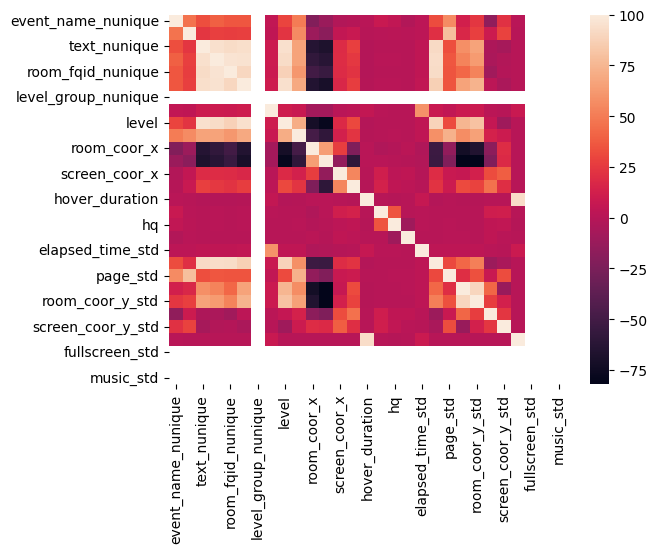

In [ ]:
sns.heatmap((new_df.corr())*100)
plt.show()

<ipython-input-32-4abb76bef89f>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.cov())


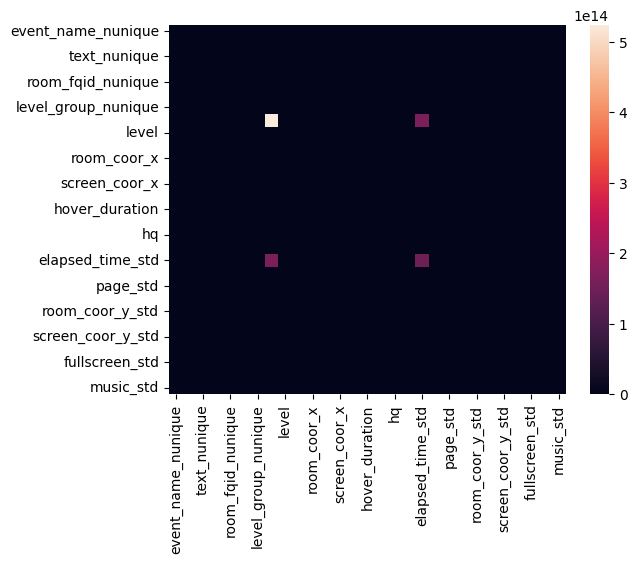

In [ ]:
sns.heatmap(new_df.cov())
plt.show()

# DATA PREPROCESSING

In [ ]:
new_df.sample(10)

,level_group,event_name_nunique,name_nunique,text_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,level_group_nunique,elapsed_time,level,...,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std,fullscreen_std,hq_std,music_std
session_id,,,,,,,,,,,,,,,,,,,,,
20110309025767336,5-12,10,3,122,47,12,24,1,5.767972e+05,8.361702,...,2.353329,-1.000000,385.525744,155.214832,216.554086,122.240599,3046.293783,0.0,0.0,0.0
21020210230855960,0-4,10,3,58,26,6,16,1,1.627121e+05,1.884817,...,1.352320,-1.000000,415.498132,143.399736,233.100324,108.899515,716.846179,0.0,0.0,0.0
21040316092154170,0-4,7,3,58,21,6,13,1,8.137408e+04,1.831933,...,1.174008,-1.000000,485.079827,213.944162,281.189001,146.851816,-1.000000,0.0,0.0,0.0
21030221194087236,0-4,10,4,54,21,6,11,1,6.362213e+04,2.116822,...,1.225855,0.000000,409.094152,157.284273,249.094866,130.057729,1166.146891,0.0,0.0,0.0
21100511294237860,13-22,11,4,174,53,13,39,1,2.520256e+06,17.367400,...,2.247526,0.904534,640.852064,248.136451,258.014635,113.049085,1395.487184,0.0,0.0,0.0
21010517192531972,0-4,11,4,64,27,6,18,1,1.081345e+05,1.923077,...,1.288022,0.000000,418.072925,163.990495,237.603198,122.717947,2475.590788,0.0,0.0,0.0
21070310220024308,5-12,10,3,116,40,11,20,1,4.454315e+05,8.189873,...,2.196353,-1.000000,366.415492,147.020221,195.876718,128.837360,2508.660109,0.0,0.0,0.0
21010310091026664,5-12,10,3,118,42,11,20,1,3.434940e+06,8.175227,...,2.123346,-1.000000,367.583284,154.771130,267.591356,142.947093,1009.720076,0.0,0.0,0.0
21000114363898910,5-12,11,4,143,42,11,24,1,9.194296e+05,8.617073,...,2.027247,0.925820,327.535578,136.779845,201.672593,121.799633,2228.068791,0.0,0.0,0.0


In [ ]:
new_df.columns

Index(['level_group', 'event_name_nunique', 'name_nunique', 'text_nunique',
       'fqid_nunique', 'room_fqid_nunique', 'text_fqid_nunique',
       'level_group_nunique', 'elapsed_time', 'level', 'page', 'room_coor_x',
       'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration',
       'fullscreen', 'hq', 'music', 'elapsed_time_std', 'level_std',
       'page_std', 'room_coor_x_std', 'room_coor_y_std', 'screen_coor_x_std',
       'screen_coor_y_std', 'hover_duration_std', 'fullscreen_std', 'hq_std',
       'music_std'],
      dtype='object')

In [ ]:
new_df.nunique()

level_group                3
event_name_nunique         5
name_nunique               4
text_nunique             139
fqid_nunique              60
room_fqid_nunique         11
text_fqid_nunique         41
level_group_nunique        1
elapsed_time           70685
level                  47418
page                    2327
room_coor_x            70641
room_coor_y            70621
screen_coor_x          69156
screen_coor_y          69102
hover_duration         59886
fullscreen                 2
hq                         2
music                      2
elapsed_time_std       70686
level_std              69962
page_std                7512
room_coor_x_std        70686
room_coor_y_std        70686
screen_coor_x_std      70686
screen_coor_y_std      70686
hover_duration_std     64965
fullscreen_std             1
hq_std                     1
music_std                  1
dtype: int64

In [ ]:
print('unique values in fullscreen_std',new_df.fullscreen_std.unique())
print('unique values in hq_std',new_df.music_std.unique())
print('unique values in music_std',new_df.hq_std.unique())

unique values in fullscreen_std [0.]
unique values in hq_std [0.]
unique values in music_std [0.]


In [ ]:
new_df.drop(['fullscreen_std','music_std','hq_std','text_nunique'], axis=1, inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70686 entries, 20090312431273200 to 22100221145014656
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   level_group          70686 non-null  category
 1   event_name_nunique   70686 non-null  int64   
 2   name_nunique         70686 non-null  int64   
 3   fqid_nunique         70686 non-null  int64   
 4   room_fqid_nunique    70686 non-null  int64   
 5   text_fqid_nunique    70686 non-null  int64   
 6   level_group_nunique  70686 non-null  int64   
 7   elapsed_time         70686 non-null  float64 
 8   level                70686 non-null  float64 
 9   page                 70686 non-null  float32 
 10  room_coor_x          70686 non-null  float32 
 11  room_coor_y          70686 non-null  float32 
 12  screen_coor_x        70686 non-null  float32 
 13  screen_coor_y        70686 non-null  float32 
 14  hover_duration       70686 non-null  float

In [ ]:
new_df.describe()

,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,level_group_nunique,elapsed_time,level,page,room_coor_x,...,hq,music,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
count,70686.000000,70686.000000,70686.000000,70686.000000,70686.000000,70686.0,7.068600e+04,70686.000000,70686.000000,70686.000000,...,70686.000000,70686.000000,7.068600e+04,70686.000000,70686.000000,70686.000000,70686.000000,70686.000000,70686.000000,7.068600e+04
mean,10.390021,3.885324,40.468650,10.268908,23.838412,1.0,2.811806e+06,9.311221,1.439995,-33.454849,...,0.120278,0.926449,9.322398e+05,1.916549,0.038805,468.689088,183.186301,240.795420,124.016602,1.322598e+04
std,0.832923,0.799293,13.020929,2.928351,8.989095,0.0,2.289877e+07,6.523788,2.350494,80.784378,...,0.325289,0.261040,1.206491e+07,0.492239,0.785170,106.991644,48.884988,28.709135,15.844603,4.868272e+05
min,7.000000,3.000000,18.000000,5.000000,8.000000,1.0,4.591262e+02,0.923372,-1.000000,-461.440765,...,0.000000,0.000000,2.337003e+02,0.684670,-1.000000,261.425412,90.098533,109.415466,68.257406,-1.000000e+00
25%,10.000000,3.000000,25.000000,7.000000,15.000000,1.0,1.642777e+05,2.051613,-1.000000,-90.615677,...,0.000000,1.000000,8.240024e+04,1.295298,-1.000000,381.066225,143.588600,222.569734,113.994303,1.368802e+03
50%,11.000000,4.000000,43.000000,11.000000,23.000000,1.0,5.882137e+05,8.140526,1.000000,-20.255625,...,0.000000,1.000000,1.440869e+05,2.099711,0.000000,431.901352,162.941973,238.383832,122.388964,2.041432e+03
75%,11.000000,4.000000,51.000000,12.000000,32.000000,1.0,1.351434e+06,17.592593,4.000000,23.220109,...,0.000000,1.000000,2.240529e+05,2.316163,0.735893,585.347609,233.385259,255.083349,132.067430,3.105588e+03
max,11.000000,6.000000,81.000000,17.000000,48.000000,1.0,1.191886e+09,20.222101,6.000000,328.096100,...,1.000000,1.000000,9.946229e+08,3.580235,2.715695,817.257133,349.049304,612.958607,331.833790,7.837739e+07


<Axes: ylabel='session_id'>

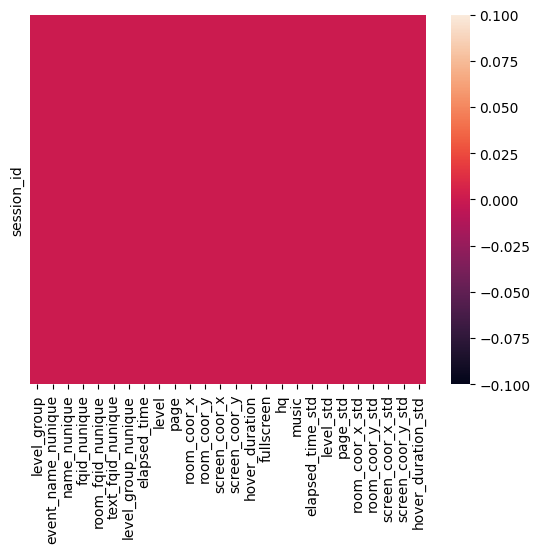

In [ ]:
sns.heatmap(new_df.isnull(),yticklabels=False)

# MODEL TRAINING

In [ ]:
new_df.shape

(70686, 26)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

X_train, X_test= train_test_split(new_df, test_size=0.2)

In [ ]:
print('Size of train set:',X_train.shape[0])
print('Size of train set:',X_test.shape[0])

Size of train set: 56548
Size of train set: 14138


In [ ]:
train_df = X_train[X_train.level_group == '0-4']
train_users = train_df.index.values
print(train_users)
train_labels.loc[train_labels.n==1].set_index('session').loc[train_users]

[21100015212196896 22020508414780490 22050114513942210 ...
 21030309015138900 21060316120819920 21020108525332264]


,correct,n
session,,
21100015212196896,1,1
22020508414780490,1,1
22050114513942210,1,1
20110122151829320,1,1
21100218543171816,1,1
...,...,...
20110310463989760,0,1
20100510353004332,0,1
21030309015138900,1,1


In [ ]:
scores = []
for q_num in range(1,19):
  if q_num<=4: group = '0-4'
  elif q_num<=12: group = '5-12'
  elif q_num<=22: group = '13-22'

  df_tr = X_train[X_train['level_group']== group]
  train_users = df_tr.index.values
  df_test = X_test[X_test['level_group']== group]
  test_users = df_test.index.values

  labels_tr = train_labels[train_labels['n']== q_num].set_index('session').loc[train_users]
  labels_test = train_labels[train_labels['n']== q_num].set_index('session').loc[test_users]

  df_tr['correct'] = labels_tr['correct']
  df_test['correct'] = labels_test['correct']

  X_train_final = df_tr.drop('level_group', axis=1)
  X_test_final = df_test.drop('level_group', axis=1)

  rfc = RandomForestClassifier(n_estimators=300)
  rfc.fit(X_train_final.drop('correct',axis=1), X_train_final['correct'])
  scores.append( {
      'Q_no' : q_num,
      'Score' : rfc.score(X_test_final.drop('correct',axis=1), X_test_final['correct'])
  })

<ipython-input-54-8d606973df4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['correct'] = labels_tr['correct']
<ipython-input-54-8d606973df4a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['correct'] = labels_test['correct']
<ipython-input-54-8d606973df4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
scores = pd.DataFrame(scores)
scores

,Q_no,Score
0,1,0.734450
1,2,0.977173
2,3,0.932775
3,4,0.804398
4,5,0.604967
5,6,0.769407
6,7,0.740818
7,8,0.605384
8,9,0.746244
9,10,0.592237


In [ ]:
final_score = []

for q_num in range(1,19):
  if q_num<=4: group = '0-4'
  elif q_num<=12: group = '5-12'
  elif q_num<=22: group = '13-22'

  df_q = new_df[new_df['level_group']== group]
  users = df_q.index.values

  labels = train_labels[train_labels['n'] == q_num].set_index('session').loc[users]

  x = df_q.drop('level_group',axis=1)
  y = labels['correct']
  print('Question Number', q_num)
  cvs = cross_val_score(RandomForestClassifier(n_estimators=300), x, y, cv = StratifiedKFold(n_splits=4))
  final_score.append({
      'Q_no': q_num,
      'Score': cvs.mean()
  })

Question Number 1
Question Number 2
Question Number 3
Question Number 4
Question Number 5
Question Number 6
Question Number 7
Question Number 8
Question Number 9
Question Number 10
Question Number 11
Question Number 12
Question Number 13
Question Number 14
Question Number 15
Question Number 16
Question Number 17
Question Number 18


In [ ]:
final_score = pd.DataFrame(final_score)
final_score

,Q_no,Score
0,1,0.727273
1,2,0.978779
2,3,0.934046
3,4,0.797428
4,5,0.608268
5,6,0.779688
6,7,0.735464
7,8,0.613446
8,9,0.739836
9,10,0.590485


In [ ]:
final_score = []

for q_num in range(1,19):
  if q_num<=4: group = '0-4'
  elif q_num<=12: group = '5-12'
  elif q_num<=22: group = '13-22'

  df_q = new_df[new_df['level_group']== group]
  users = df_q.index.values

  labels = train_labels[train_labels['n'] == q_num].set_index('session').loc[users]

  x = df_q.drop('level_group',axis=1)
  y = labels['correct']
  print('Question Number', q_num)
  X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, shuffle= True)
  rfc = RandomForestClassifier()
  rfc.fit(X_train, y_train)
  final_score.append({
      'Q_no': q_num,
      'Score': rfc.score(X_test, y_test)
  })